<a href="https://colab.research.google.com/github/anubhavgarg24/Gmail-dataset/blob/main/Gmail_dataset_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Submitted by : Anubhav Garg 191321



***UPLOADING .mbox FILE***


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Archived.mbox to Archived (2).mbox


***LOAD THE DATASET***

In [ ]:
import mailbox
mboxfile = "Archived.mbox"
mbox = mailbox.mbox(mboxfile)
mbox

**[1] Display the list of keys that are present in the extracted dataset.**

*We can use itervalues() method of mbox object to get the list of keys that are present.*

In [ ]:
for mail in mbox.itervalues():
    mail1 = dict(mail.items())
    print(mail1.keys())
    break

dict_keys(['X-GM-THRID', 'X-Gmail-Labels', 'MIME-Version', 'Date', 'Message-ID', 'Subject', 'From', 'To', 'Content-Type'])


In [ ]:
cols = ['Subject','Date','From','To','X-Gmail-Labels','X-GM-THRID']
data1 = []
for mail in mbox.itervalues():
    mail1 = dict(mail.items())
    data1.append({key:mail1[key] if key in mail1.keys() else '' for key in cols})
print ('Number of mails:' ,len(data1))

Number of mails: 11


[2] Import csv package and create a new csv file with only the following six attributes:<br> **Subject, from, date, to, X-Gmail-Labels, X-GM-THRID** <br>
Name this file as mailbox.csv 

In [ ]:
import csv
req_data = data1
with open('mailbox.csv', 'w') as output_file:
    writer = csv.DictWriter(output_file, cols)
    writer.writeheader()
    writer.writerows(req_data)

In [ ]:
import pandas as pd
mail_df = pd.read_csv('mailbox.csv')

**[3] Check the datatypes of each column**

*We can get the datatypes of each column by accessing dtypes attribute of df object.*

In [ ]:
mail_df.dtypes

Subject           object
Date              object
From              object
To                object
X-Gmail-Labels    object
X-GM-THRID         int64
dtype: object

**[4] Remove NaN values from the field date and rename the file as gmail.csv**

*While we will delete the NaN values from Date column using dropna and rename the file using the os module.*

In [ ]:
import os
gmail_df=mail_df.dropna(subset=['Date'], inplace=True)
os.rename('mailbox.csv','gmail.csv')

**[5] Display first ten records from the dataset gmail.csv** 

*We can display the first ten records of the dataset using the head(int) method and passing the number of records required from the start.*

In [ ]:
gmail_df=pd.read_csv('gmail.csv')
gmail_df.head(10)

,Subject,Date,From,To,X-Gmail-Labels,X-GM-THRID
0,unable to join class due to network issue,"Thu, 8 Oct 2020 15:29:52 +0530",ANUBHAV GARG 191321 <191321@juitsolan.in>,Hari Singh Rawat <hari.singh@juitsolan.in>,Recieved,1679977191760934941
1,Re: Anydesk credentials,"Thu, 20 Aug 2020 16:15:49 +0530",Hardeep Rana <hardeep.rana@juitsolan.in>,ANUBHAV GARG 191321 <191321@juitsolan.in>,Recieved,1675537446622578032
2,Anydesk credentials,"Thu, 20 Aug 2020 15:17:39 +0530",ANUBHAV GARG 191321 <191321@juitsolan.in>,hardeep.rana@juitsolan.in,Recieved,1675537446622578032
3,T2 : 191321 4 subjective questions,"Tue, 13 Apr 2021 11:20:51 +0530",ANUBHAV GARG 191321 <191321@juitsolan.in>,Amit Kumar <amit.kumar@juitsolan.in>,Recieved,1696903161377454235
4,Fwd: Withdraw from ECE Minor,"Thu, 12 Aug 2021 20:37:47 +0530",ANUBHAV GARG 191321 <191321@juitsolan.in>,Nafis uddin Khan <nafisuddin.khan@juitsolan.in...,Recieved,1702900628438090625
5,Withdraw from ECE Minor,"Fri, 18 Jun 2021 16:14:58 +0530",ANUBHAV GARG 191321 <191321@juitsolan.in>,"Rajiv Kumar <rajiv.kumar@juitsolan.in>, \r\n\t...",Recieved,1702900628438090625
6,Re: Information regarding Data Science Profici...,"Fri, 3 Dec 2021 20:59:36 +0530",ANUBHAV GARG 191321 <191321@juitsolan.in>,Vivek Sehgal <vivek.sehgal@juitsolan.in>,Recieved,1718129273279841072
7,Re: Information regarding Data Science Profici...,"Fri, 3 Dec 2021 20:21:33 +0530",Vivek Sehgal <vivek.sehgal@juitsolan.in>,ANUBHAV GARG 191321 <191321@juitsolan.in>,Recieved,1718129273279841072
8,Information regarding Data Science Proficiency,"Fri, 3 Dec 2021 18:26:29 +0530",ANUBHAV GARG 191321 <191321@juitsolan.in>,Vivek Sehgal <vivek.sehgal@juitsolan.in>,Recieved,1718129273279841072
9,NaN,"Tue, 25 May 2021 08:52:44 +0000 (UTC)",amit garg <garg_amit03@yahoo.co.in>,ANUBHAV GARG 191321 <191321@juitsolan.in>,Recieved,1700706267554961772


**[6] Import re (regular expression) package**


In [ ]:
import re
import numpy as np
from IPython.display import display, HTML

**[7] Now, define a function that takes an entire string from any column and extracts and email  address.** 

*We can use regular expression to extract email address from any column.*

In [ ]:
def extractAddress(fromString):
        extractedAddress = re.findall(r'<(.+?)>', fromString)
        if not extractedAddress:
                return np.NAN
        return str(extractedAddress[0])

**[8] Apply this function to the column ‘from’**


In [ ]:
df = pd.read_csv('gmail.csv', names=['Subject','Date','From','To','X-Gmail-Labels','X-GM-THRID'])
df['From'] = df['From'].apply(lambda x:extractAddress(x))
print(df['From'])

0                           NaN
1           191321@juitsolan.in
2     hardeep.rana@juitsolan.in
3           191321@juitsolan.in
4           191321@juitsolan.in
5           191321@juitsolan.in
6           191321@juitsolan.in
7           191321@juitsolan.in
8     vivek.sehgal@juitsolan.in
9           191321@juitsolan.in
10      garg_amit03@yahoo.co.in
11          191321@juitsolan.in
Name: From, dtype: object


**[9] Next, refactor the label field. If an email is from your email address then it is the sent  mail. Otherwise, it is a received email, that is, an inbox email. (Note that the "to" column  only contains your own email. So, we can drop this irrelevant column).** 

In [ ]:
index = 0
for message in gmail_df['From']:
    em=message
    if em=='191321@juitsolan.in':
        gmail_df.loc[index, 'X-Gmail-Labels'] = "Sent"
    else:
        gmail_df.loc[index,'X-Gmail-Labels']="Recieved"
    gmail_df.to_csv('gmail.csv',index=False)
    index+=1
print(gmail_df[['X-Gmail-Labels']])

   X-Gmail-Labels
0        Recieved
1        Recieved
2        Recieved
3        Recieved
4        Recieved
5        Recieved
6        Recieved
7        Recieved
8        Recieved
9        Recieved
10       Recieved


**[10] Whom did you communicate with most frequently?**

In [ ]:
gmail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Subject         9 non-null      object
 1   Date            11 non-null     object
 2   From            11 non-null     object
 3   To              11 non-null     object
 4   X-Gmail-Labels  11 non-null     object
 5   X-GM-THRID      11 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 656.0+ bytes


In [ ]:
gmail_df.loc[gmail_df['From'].value_counts()[0], 'From']

'ANUBHAV GARG 191321 <191321@juitsolan.in>'

In [ ]:
gmail_df.loc[gmail_df['To'].value_counts()[0], 'To']

'Amit Kumar <amit.kumar@juitsolan.in>'

In [ ]:
max(gmail_df['To'].value_counts()[0], gmail_df['From'].value_counts()[0])

8

In [ ]:
gmail_df.loc[max(gmail_df['To'].value_counts()[0], gmail_df['From'].value_counts()[0]), 'From']

'ANUBHAV GARG 191321 <191321@juitsolan.in>'

**VISUALISATION**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
recieved_mails = gmail_df['From'].value_counts()[0:10]

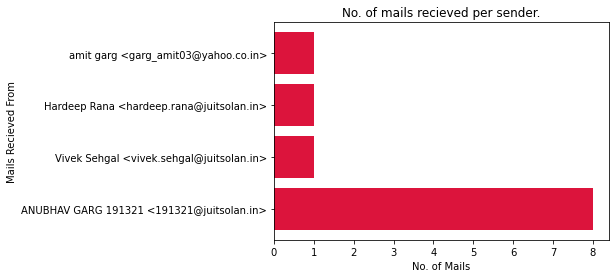

In [ ]:
plt.barh(recieved_mails.index, recieved_mails, color ='crimson')
plt.xlabel("No. of Mails")
plt.ylabel("Mails Recieved From")
plt.title("No. of mails recieved per sender.")
plt.show()

In [ ]:
sent_mails = gmail_df['To'].value_counts()[0:10]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


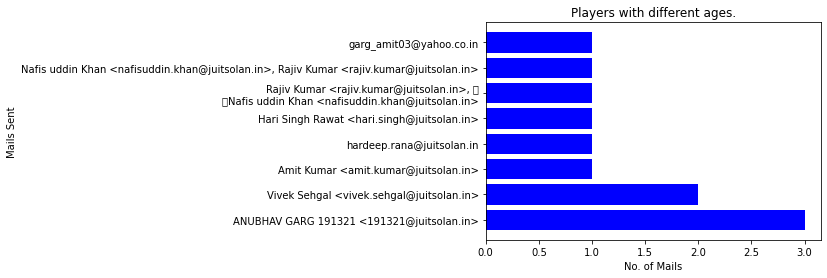

In [ ]:
plt.barh(sent_mails.index, sent_mails, color ='blue')
plt.xlabel("No. of Mails")
plt.ylabel("Mails Sent")
plt.title("Most Frequent Contacts")
plt.show()

In [ ]:
sent = gmail_df['To'].count()

In [ ]:
recieved = gmail_df['From'].count()

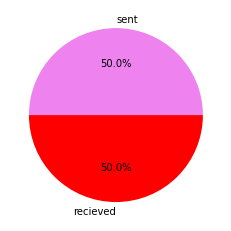

In [ ]:
plt.pie([sent, recieved], labels=['sent', 'recieved'], autopct='%1.1f%%', colors=['violet', 'red'])
plt.show()

What am I mostly emailing about?

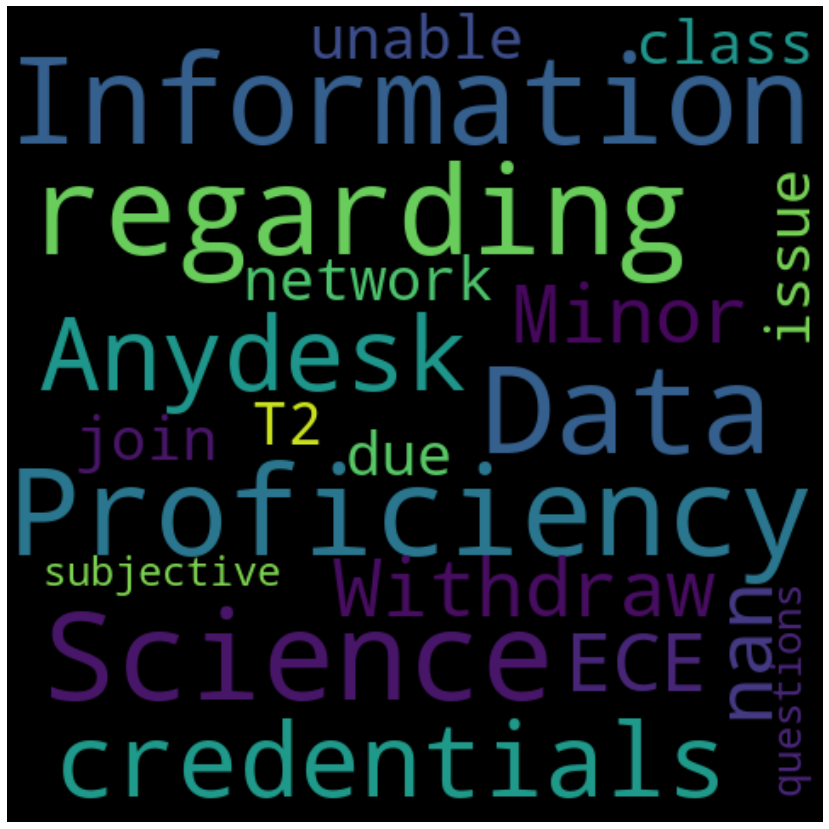

In [ ]:
textList = gmail_df['Subject'].to_list()
text = ' '.join(map(str, textList))

from wordcloud import WordCloud, STOPWORDS
# Create the wordcloud object
stopwords = ['Re', 'Fwd']
wrd = WordCloud(width=480, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

# Display the generated image:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

Average no. of emails per hour

In [ ]:
# total emails till date / (no. of days of email id * 24)
# remove emails outside gmail
import datetime
updated_df = gmail_df.drop(10)


# index = updated_df.index
# total_emails = len(index)
# print(total_emails)

# print(gmail_df['Date'])
# print(min(gmail_df['Date']))
# print(max(gmail_df['Date']))
# print(gmail_df['Date'].max())

# gmail_df['Date'] = pd.to_datetime(gmail_df['Date'])

# print(gmail_df['Date'].min(), gmail_df['Date'].max())

updated_df['Date'] = pd.to_datetime(updated_df['Date'])

diff_in_days=(updated_df['Date'].max()-updated_df['Date'].min())
diff_in_hour=diff_in_days.total_seconds()/(3600)
index = updated_df.index
total_emails = len(index)

mails_per_hour=(total_emails/diff_in_hour)
print(mails_per_hour)


0.0008860771364113535
